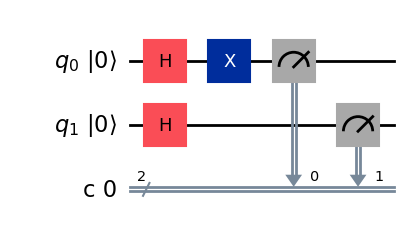

In [46]:
import numpy as np

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister,transpile

from qiskit.visualization import *

simulator = AerSimulator()

circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.x(0)
circuit.h(1)

circuit.barrier()

circuit.measure([0,1],[0,1])

circuit.draw('mpl', plot_barriers=False, initial_state=True)


In [47]:
# 回路の最適化とトランスパイル
compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit, shots=1024)  # 1024回実行
result = job.result()

counts = result.get_counts(compiled_circuit)
print(counts)

{'01': 245, '10': 252, '00': 253, '11': 274}


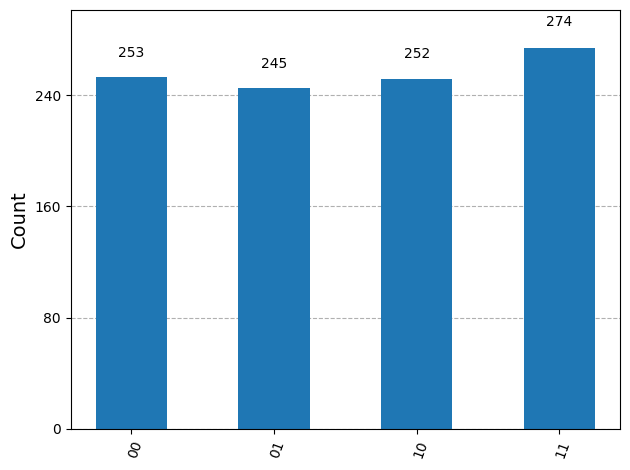

In [48]:
plot_histogram(result.get_counts(compiled_circuit))